# Assignment 4 Notebook
## Kaplan-Meier Analysis

C:\Users\viole\AppData\Local\Temp\ipykernel_12848\1830945719.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  relevant_data['Status'].replace(["Dead", "Alive"],
C:\Users\viole\AppData\Local\Temp\ipykernel_12848\1830945719.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  relevant_data['Status

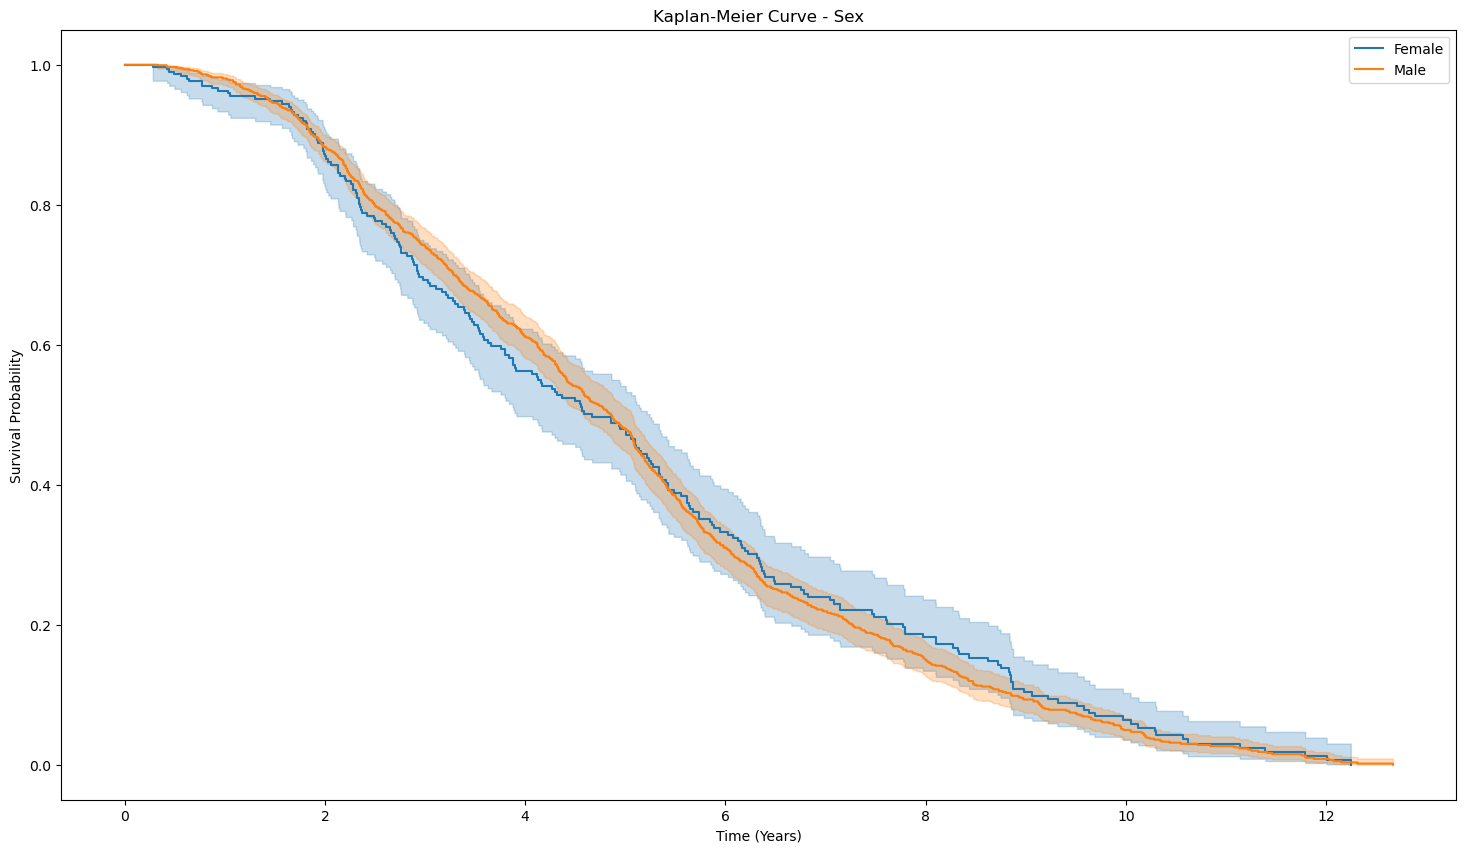

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.07 0.79      0.35

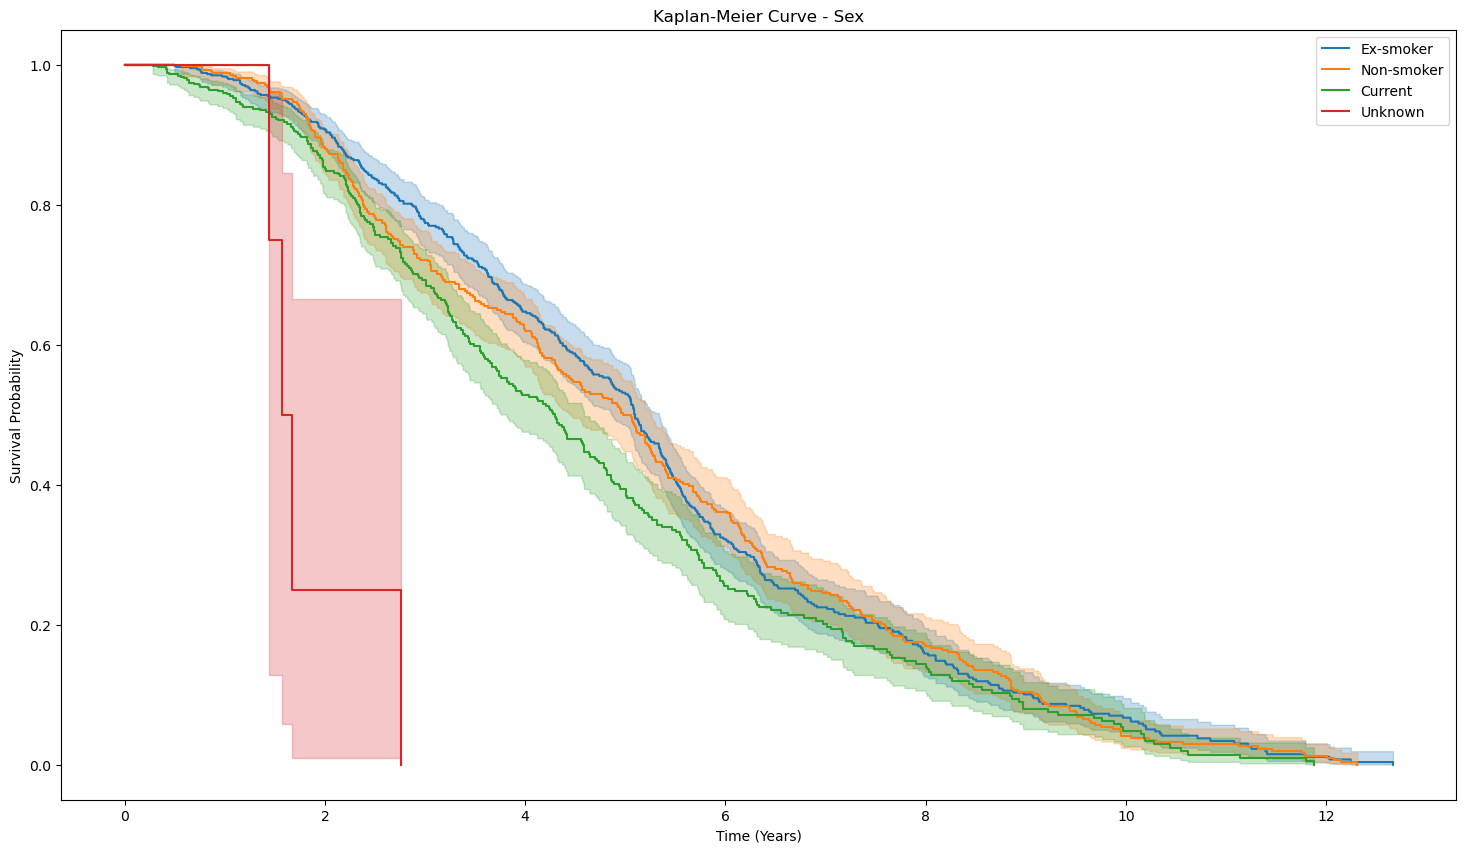

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          35.42 <0.005     23.26

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test

# import data
data = pd.read_excel("../Data/RADCURE_Clinical_v04_20241219.xlsx")

# clean and preprocess data
missing_data = data.isnull().sum() / len(data) # calculate ratio of missing values per column

drop_cols = missing_data[missing_data > 0.6].index # create an index of columns that exceed threshold
clean_data = data.drop(drop_cols, 
                       axis = 1) # remove qualifying columns

clean_data.dropna(inplace = True)

relevant_data = clean_data[["Age", 
                           "Sex", 
                           "ECOG PS", 
                           "Smoking Status", 
                           "Ds Site", 
                           "Path", 
                           "Status", 
                           "Length FU"]]

relevant_data['Status'].replace(["Dead", "Alive"], 
                                [0, 1], 
                                inplace = True)


# group1: sex
sex_female = relevant_data[relevant_data['Sex'] == 'Female']
sex_male = relevant_data[relevant_data['Sex'] == 'Male']

# fit KME
kmf_female = KaplanMeierFitter()
kmf_male = KaplanMeierFitter()

kmf_female.fit(sex_female['Length FU'], 
               event_observed = sex_female['Status'], 
               label = 'Female')
kmf_male.fit(sex_male['Length FU'], 
               event_observed = sex_male['Status'], 
               label = 'Male')

# Plot the Kaplan-Meier curve
plt.figure(figsize = (18, 10))
kmf_female.plot_survival_function()
kmf_male.plot_survival_function()
plt.title('Kaplan-Meier Curve - Sex')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.show()

# perform log-rank test
lrt_sex = logrank_test(sex_female['Length FU'], 
                       sex_male['Length FU'], 
                       sex_female['Status'], 
                       sex_male['Status'])
lrt_sex.print_summary()

# group2: smoking status
# print(clean_data['Smoking Status'].unique()) # 'Ex-smoker' 'Non-smoker' 'Current' 'unknown'
ss_ex = relevant_data[relevant_data['Smoking Status'] == 'Ex-smoker']
ss_non = relevant_data[relevant_data['Smoking Status'] == 'Non-smoker']
ss_current = relevant_data[relevant_data['Smoking Status'] == 'Current']
ss_unknown = relevant_data[relevant_data['Smoking Status'] == 'unknown']

# fit KME
kmf_ex = KaplanMeierFitter()
kmf_non = KaplanMeierFitter()
kmf_current = KaplanMeierFitter()
kmf_unknown = KaplanMeierFitter()

kmf_ex.fit(ss_ex['Length FU'], 
               event_observed = ss_ex['Status'], 
               label = 'Ex-smoker')
kmf_non.fit(ss_non['Length FU'], 
               event_observed = ss_non['Status'], 
               label = 'Non-smoker')
kmf_current.fit(ss_current['Length FU'], 
               event_observed = ss_current['Status'], 
               label = 'Current')
kmf_unknown.fit(ss_unknown['Length FU'], 
               event_observed = ss_unknown['Status'], 
               label = 'Unknown')

# Plot the Kaplan-Meier curve
plt.figure(figsize = (18, 10))
kmf_ex.plot_survival_function()
kmf_non.plot_survival_function()
kmf_current.plot_survival_function()
kmf_unknown.plot_survival_function()
plt.title('Kaplan-Meier Curve - Sex')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.show()

# perform log-rank test
lrt_ss = multivariate_logrank_test(relevant_data['Length FU'], 
                                   relevant_data['Smoking Status'], 
                                   relevant_data['Status'])
lrt_ss.print_summary()


## Cox Proportional Hazards Model

<lifelines.CoxPHFitter: fitted with 1584 total observations, 441 right-censored observations>
             duration col = 'Length FU'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 1584
number of events observed = 1143
   partial log-likelihood = -7014.30
         time fit was run = 2025-07-10 22:29:18 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
Age             0.01      1.01      0.00            0.00            0.02                1.00                1.02
Sex             0.06      1.06      0.07           -0.09            0.21                0.92                1.23
ECOG PS         0.07      1.07      0.05           -0.02            0.16                0.98                1.17
Smoking Status  0.11      1.12      0.04            0.04            0.19                1.04                1.20
Ds Site         0.26      1.30      0.03            0.20            0.32                1.22                1.38
Path            0.04      1.04      0.05           -0.06            0.14                0.94                1.16

                cmp to    z      p  -log2(p)
covariate                                   
Age               0.00 2.85 <0.005      7.84
Sex               0.00 0.81   0.42      1.26
ECOG PS           0.00 1.53   0.13      2.98
Smoking Status    0.00 3.04 <0.005      8.71
Ds Site           0.00 8.71 <0.005     58.14
Path              0.00 0.82   0.41      1.28
---
Concordance = 0.58
Partial AIC = 14040.60
log-likelihood ratio test = 89.37 on 6 df
-log2(p) of ll-ratio test = 54.44

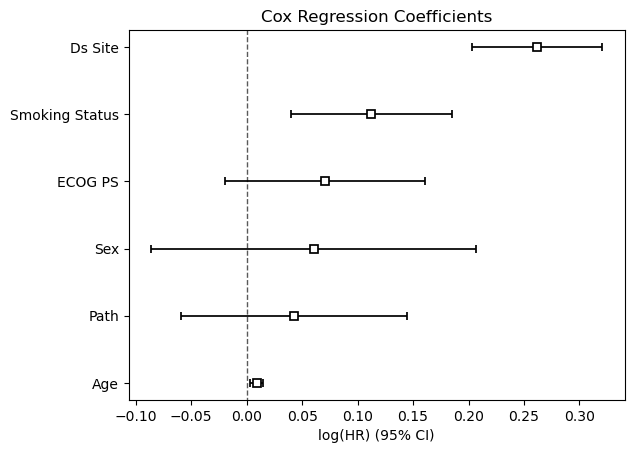


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1584 total observations, 441 right-censored observations>
         test_name = proportional_hazard_test

---
                     test_statistic    p  -log2(p)
Age            km              7.08 0.01      7.00
               rank            7.17 0.01      7.08
Ds Site        km              0.03 0.86      0.21
               rank            0.02 0.90      0.15
ECOG PS        km              0.00 0.96      0.06
               rank            0.00 0.97      0.04
Path           km              0.00 0.99      0.02
               rank            0.01 0.93      0.11
Sex            km              1.05 0.31      1.71
               rank            1.15 0.28      1.82
Smoking Status km              6.09 0.01      6.20
               rank            6.37 0.01      6.43



1. Variable 'Age' failed the non-proportional test: p-value is 0.0074.

   Advice 1: the functional form of the variable 'Age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Age' using pd.cut, and then specify it in `strata=['Age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


2. Variable 'Smoking Status' failed the non-proportional test: p-value is 0.0116.

   Advice: with so few unique values (only 4), you can include `strata=['Smoking Status', ...]` in
the call in `.fit`. See docume

[[<Axes: xlabel='rank-transformed time\n(p=0.0074)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0078)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.2841)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3067)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9741)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9581)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0116)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0136)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.8999)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8634)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9267)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9853)'>]]

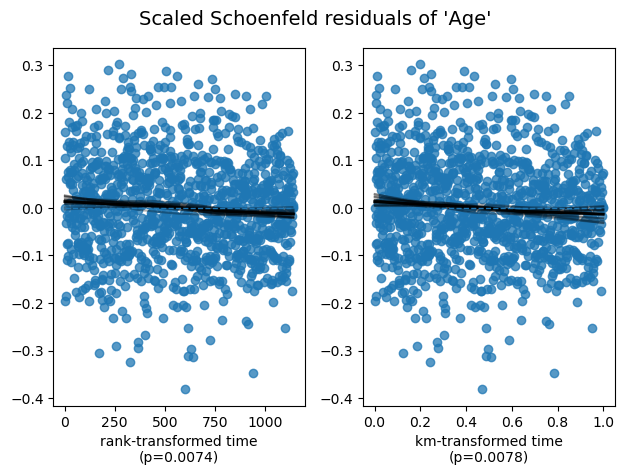

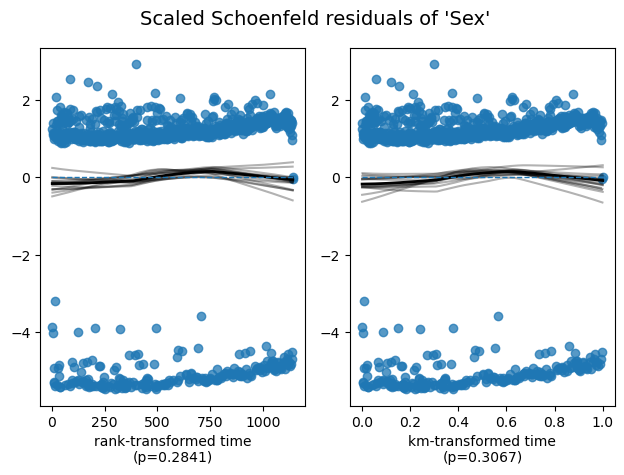

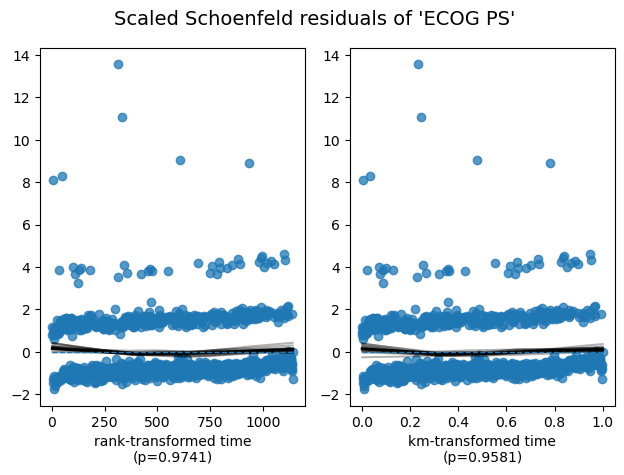

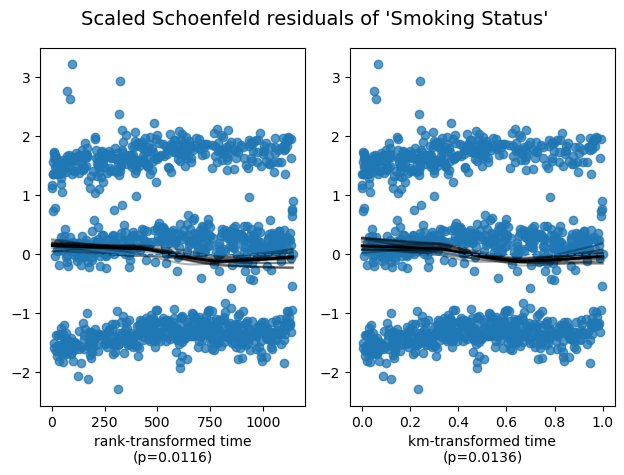

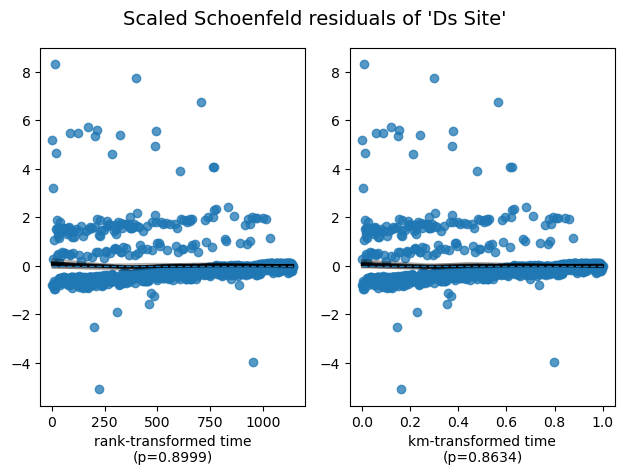

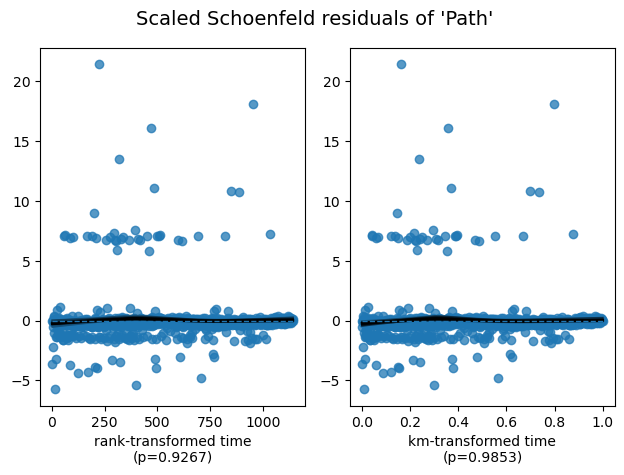

In [32]:
from lifelines import CoxPHFitter

relevant_data_num = relevant_data
for col in relevant_data_num.select_dtypes(include = [np.object_]).columns:
    relevant_data_num[col].replace(relevant_data_num[col].unique(),
                            range(0, len(relevant_data_num[col].unique())), 
                            inplace = True)
    relevant_data_num[col].astype(int)

# fit Cox PH model
cph = CoxPHFitter()
cph.fit(relevant_data_num, 
        duration_col = 'Length FU', 
        event_col = 'Status')

# Print the summary of the model
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Regression Coefficients')
plt.show()

# check assumptions
cph.check_assumptions(relevant_data_num, 
                      p_value_threshold = 0.05, 
                      show_plots = True)

## Random Survival Forest

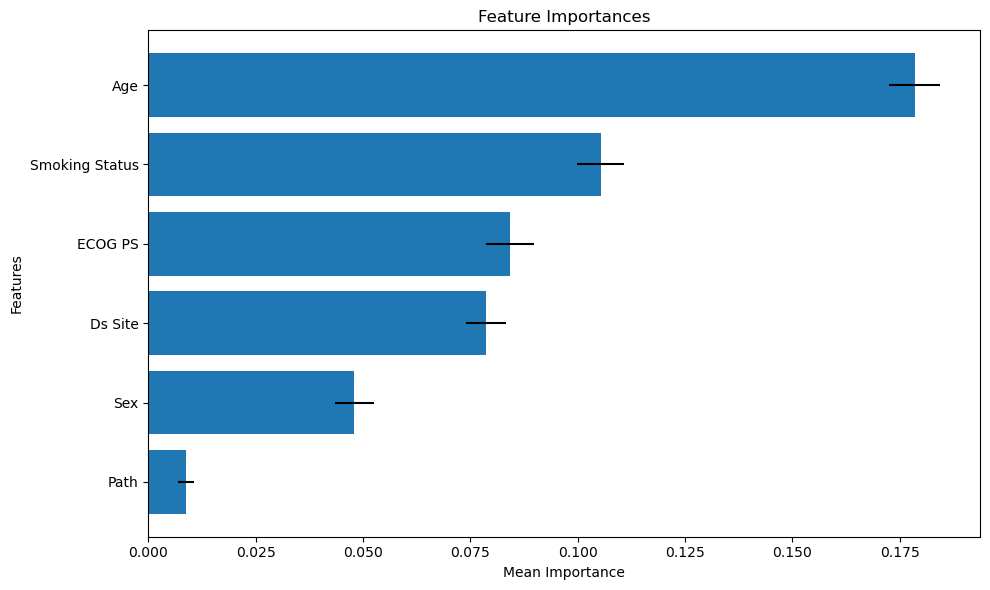

Concordance Index: 0.7392


In [42]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from sksurv.metrics import concordance_index_censored

data_x = relevant_data_num.drop(['Status', 'Length FU'], 
                         axis = 1)
data_y = np.array(list(zip(relevant_data_num['Status'].astype(bool), 
                           relevant_data_num['Length FU'].astype(float))), 
                  dtype = [('Status', 'bool'), ('Length FU', 'float')])

# Encode categorical variables
encoder = OneHotEncoder()
data_x = encoder.fit_transform(data_x)

# Train a Random Survival Forest model
rsf = RandomSurvivalForest(random_state = 27)
rsf.fit(data_x, data_y)

# please refer to https://scikit-survival.readthedocs.io/en/stable/user_guide/random-survival-forest.html
result = permutation_importance(rsf, 
                                data_x, 
                                data_y, 
                                n_repeats=15, 
                                random_state = 27)
feature_importance = pd.DataFrame(
         {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index = data_x.columns,
).sort_values(by = "importances_mean", 
              ascending = False)

# Sort by importances_mean and plot
feature_importance = feature_importance.sort_values(by = "importances_mean", 
                                                    ascending = False)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(feature_importance.index, 
         feature_importance['importances_mean'], 
         xerr = feature_importance['importances_std'], 
         align = 'center')
plt.xlabel('Mean Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# concordance index
risk_scores = rsf.predict(data_x)

c_index = concordance_index_censored(data_y['Status'], data_y['Length FU'], risk_scores)[0]
print(f'Concordance Index: {c_index:.4f}')